In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df_Train = pd.read_csv('/content/gdrive/MyDrive/Data science/Train.csv')

print(df_Train.count()) # Train 데이터 개수
print(df_Train.isnull().sum()) #Train 데이터 중 NAN 데이터의 개수

ID                 8068
Gender             8068
Ever_Married       7928
Age                8068
Graduated          7990
Profession         7944
Work_Experience    7239
Spending_Score     8068
Family_Size        7733
Var_1              7992
Segmentation       8068
dtype: int64
ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64


In [ ]:
df_Train

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [ ]:
df_Test = pd.read_csv('/content/gdrive/MyDrive/Data science/Test.csv')
print(df_Test.count()) # Test 데이터 개수
print(df_Test.isnull().sum()) # Test 데이터 중 NAN 데이터의 개수

ID                 2627
Gender             2627
Ever_Married       2577
Age                2627
Graduated          2603
Profession         2589
Work_Experience    2358
Spending_Score     2627
Family_Size        2514
Var_1              2595
Segmentation       2627
dtype: int64
ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
Segmentation         0
dtype: int64


In [ ]:
df_Test

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6,C
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C


# 데이터 시각화


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


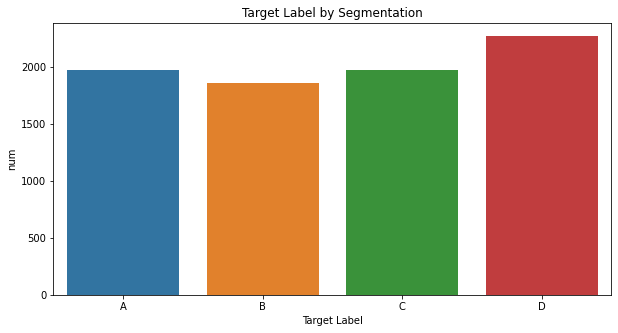

In [ ]:
plt.subplots(figsize=(10,5))
sns.countplot(df_Train['Segmentation'].sort_values())
plt.title('Target Label by Segmentation')
plt.xlabel('Target Label')
plt.ylabel('Num')


plt.show()

In [ ]:
# Gender
gender_based = pd.pivot_table(df_Train,values='ID',index=['Gender'],columns=['Segmentation'],aggfunc=np.count_nonzero)

gender_based

Segmentation,A,B,C,D
Gender,,,,
Female,909,861,922,959
Male,1063,997,1048,1309


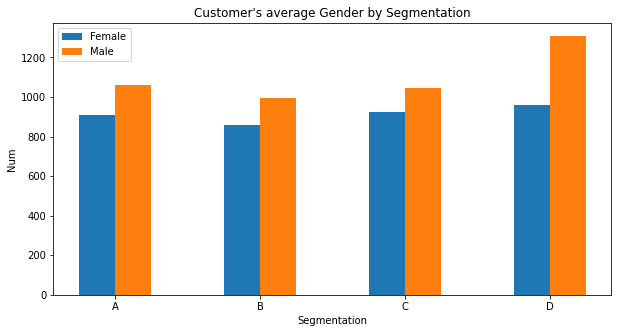

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

x = np.arange(len(gender_based.columns))
width = 0.25

fig,ax = plt.subplots(figsize=(10,5))
for i in range(len(gender_based)):
    ax.bar(x+(i*width),gender_based.loc[gender_based.index[i]],width=width, label=gender_based.index[i])

ax.set_xticks(x+((len(gender_based)/2-0.5)*width))
ax.set_xticklabels(gender_based.columns)

plt.title("Customer's average Gender by Segmentation")
ax.set_xlabel('Segmentation')
ax.set_ylabel('Num')

plt.legend(loc='best',frameon=True)
plt.show()

In [ ]:
# Ever_Married 
married_based = pd.pivot_table(df_Train,values='ID',index=['Ever_Married'],columns=['Segmentation'],aggfunc=np.count_nonzero)

married_based

Segmentation,A,B,C,D
Ever_Married,,,,
No,801,479,398,1607
Yes,1137,1348,1549,609


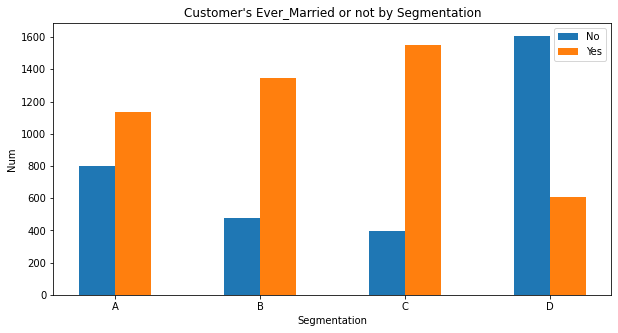

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


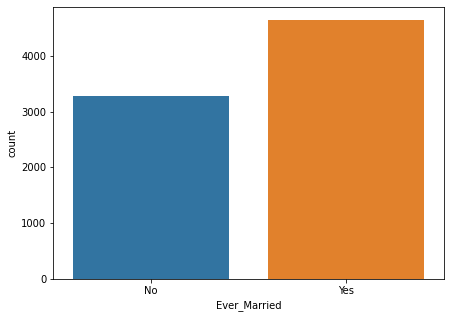

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

x = np.arange(len(married_based.columns))
width = 0.25

fig,ax = plt.subplots(figsize=(10,5))
for i in range(len(married_based)):
    ax.bar(x+(i*width),married_based.loc[married_based.index[i]],width=width, label=married_based.index[i])

ax.set_xticks(x+((len(married_based)/2-0.5)*width))
ax.set_xticklabels(married_based.columns)

plt.title("Customer's Ever_Married or not by Segmentation")
ax.set_xlabel('Segmentation')
ax.set_ylabel('Num')

plt.legend(loc='best',frameon=True)
plt.show()

fig, ax = plt.subplots(figsize=(7, 5))
sns.countplot(df_Train["Ever_Married"])

In [ ]:
# Age

age_based = pd.DataFrame(df_Train.groupby('Segmentation')['Age'].mean())

age_based

,Age
Segmentation,
A,44.924949
B,48.200215
C,49.144162
D,33.390212


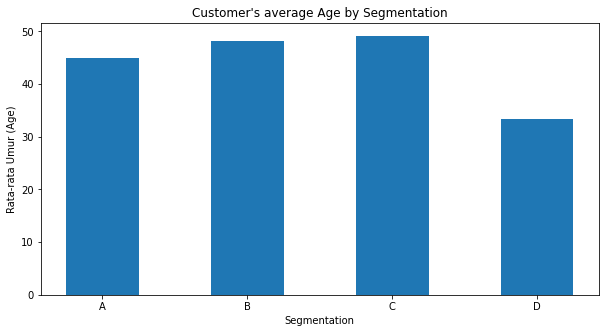

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


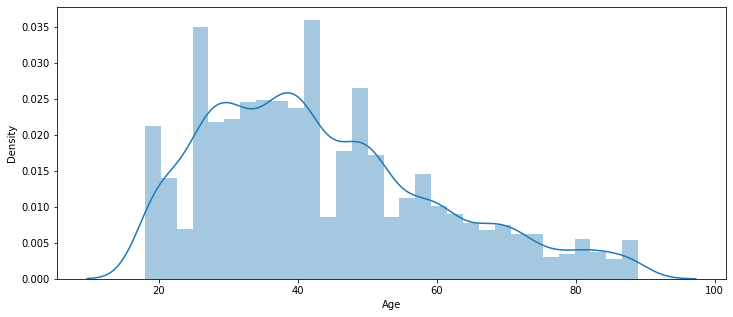

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

fig,ax = plt.subplots(figsize=(10,5))
ax.bar(age_based.index,age_based['Age'],width=0.5)

plt.title("Customer's average Age by Segmentation")
ax.set_xlabel('Segmentation')
ax.set_ylabel('Rata-rata Umur (Age)')
plt.show()

fig, ax = plt.subplots(figsize=(12,5))
sns.distplot(df_Train["Age"])

In [ ]:
# Profession

prof_based = pd.pivot_table(df_Train,values='ID',index=['Profession'],columns=['Segmentation'], aggfunc= ['count'] )

prof_based 

count                
Segmentation      A    B     C    D
Profession                         
Artist          558  756  1065  137
Doctor          199  143   140  206
Engineer        259  189    75  176
Entertainment   365  221   148  215
Executive       125  183   175  116
Healthcare      106  101   146  979
Homemaker        73   55    28   90
Lawyer          197  158   140  128
Marketing        57   30    35  170

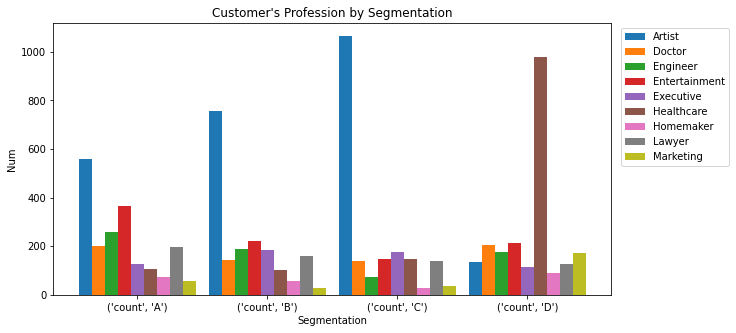

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


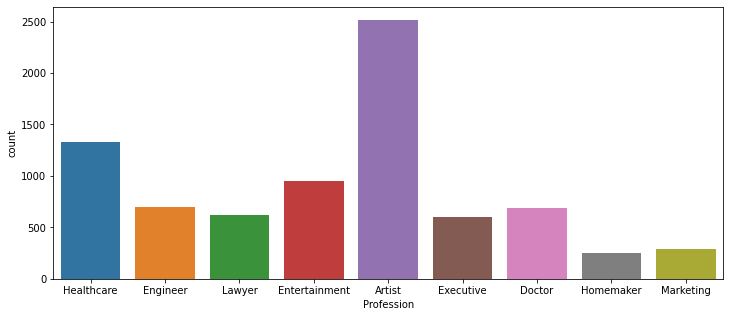

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

x = np.arange(len(prof_based.columns))
width = 0.1

fig,ax = plt.subplots(figsize=(10,5))
for i in range(len(prof_based)):
    ax.bar(x+(i*width),prof_based.loc[prof_based.index[i]],width=width, label=prof_based.index[i])

ax.set_xticks(x+((len(prof_based)/2-0.5)*width))
ax.set_xticklabels(prof_based.columns)

plt.title("Customer's Profession by Segmentation")
ax.set_xlabel('Segmentation')
ax.set_ylabel('Num')

plt.legend(loc='best',bbox_to_anchor=(0.92,0.40,0.3,0.6),frameon=True)
plt.show()

fig, ax = plt.subplots(figsize=(12,5))
sns.countplot(df_Train["Profession"])




In [ ]:
# Work_Experience

workexp_based = pd.DataFrame(df_Train.groupby('Segmentation')['Work_Experience'].mean())

workexp_based

,Work_Experience
Segmentation,
A,2.874578
B,2.378151
C,2.240771
D,3.021717


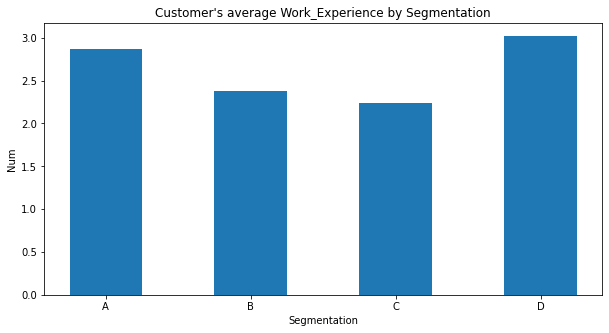

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


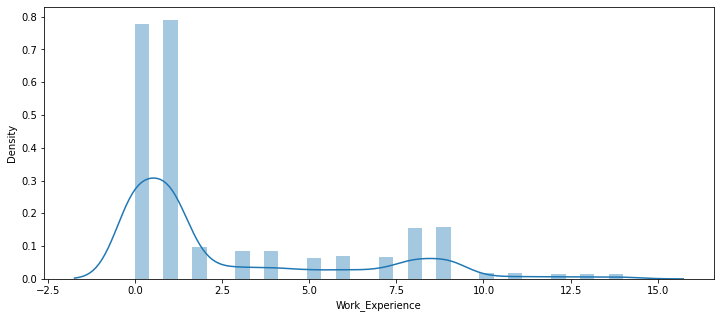

In [ ]:
fig,ax = plt.subplots(figsize=(10,5))
ax.bar(workexp_based.index,workexp_based['Work_Experience'],width=0.5)

plt.title("Customer's average Work_Experience by Segmentation")
ax.set_xlabel('Segmentation')
ax.set_ylabel('Num')
plt.show()

fig, ax = plt.subplots(figsize=(12,5))
sns.distplot(df_Train["Work_Experience"])


In [ ]:
spend_based = pd.pivot_table(df_Train,values='ID',index=['Spending_Score'],columns=['Segmentation'],aggfunc=np.count_nonzero)
spend_based.sort_values(by='A',ascending=False,inplace=True)

spend_based

Segmentation,A,B,C,D
Spending_Score,,,,
Low,1358,884,662,1974
Average,343,590,903,138
High,271,384,405,156


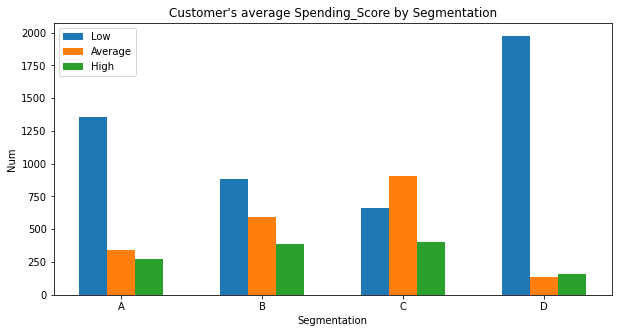

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


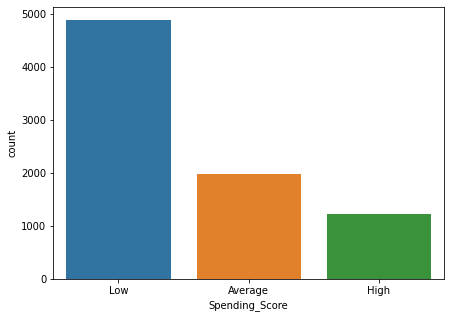

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

x = np.arange(len(spend_based.columns))
width = 0.2

fig,ax = plt.subplots(figsize=(10,5))
for i in range(len(spend_based)):
    ax.bar(x+(i*width),spend_based.loc[spend_based.index[i]],width=width, label=spend_based.index[i])

ax.set_xticks(x+((len(spend_based)/2-0.5)*width))
ax.set_xticklabels(spend_based.columns)

plt.title("Customer's average Spending_Score by Segmentation")
ax.set_xlabel('Segmentation')
ax.set_ylabel('Num')

plt.legend(loc='best',frameon=True)
plt.show()

fig, ax = plt.subplots(figsize=(7,5))
sns.countplot(df_Train["Spending_Score"])

In [ ]:
famsize_based = pd.DataFrame(df_Train.groupby('Segmentation')['Family_Size'].agg(pd.Series.mode))
famsize_based


,Family_Size
Segmentation,
A,2.0
B,2.0
C,2.0
D,4.0


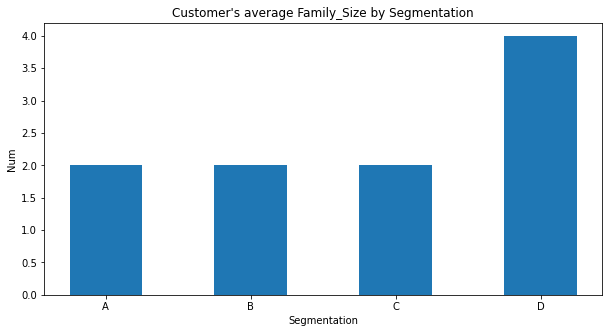

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


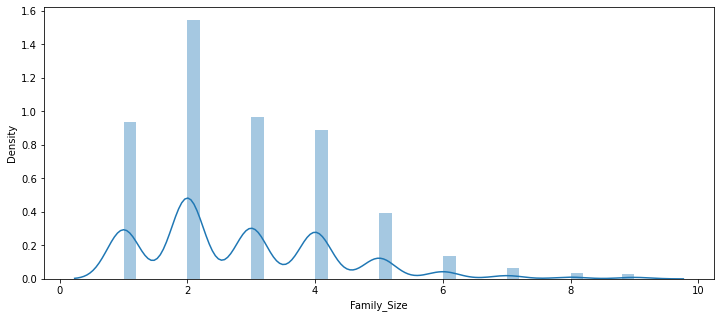

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig,ax = plt.subplots(figsize=(10,5))
ax.bar(famsize_based.index,famsize_based['Family_Size'],width=0.5)

plt.title("Customer's average Family_Size by Segmentation")
ax.set_xlabel('Segmentation')
ax.set_ylabel('Num')
plt.show()

pig, ax = plt.subplots(figsize=(12,5))
sns.distplot(df_Train["Family_Size"])

In [ ]:
var_based = pd.pivot_table(df_Train,values='ID',index=['Var_1'],columns=['Segmentation'],aggfunc=np.count_nonzero)

var_based

Segmentation,A,B,C,D
Var_1,,,,
Cat_1,31,26,26,50
Cat_2,83,106,99,134
Cat_3,223,186,154,259
Cat_4,333,232,109,415
Cat_5,19,20,18,28
Cat_6,1213,1232,1496,1297
Cat_7,51,43,47,62


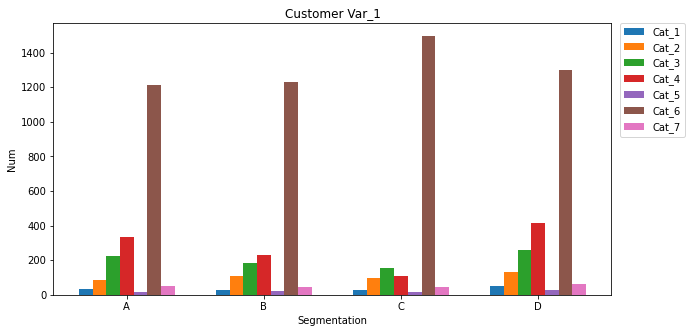

In [ ]:
x = np.arange(len(var_based.columns))
width = 0.1

fig,ax = plt.subplots(figsize=(10,5))
for i in range(len(var_based)):
    ax.bar(x+(i*width),var_based.loc[var_based.index[i]],width=width, label=var_based.index[i])

ax.set_xticks(x+((len(var_based)/2-0.5)*width))
ax.set_xticklabels(var_based.columns)

plt.title('Customer Var_1')
ax.set_xlabel('Segmentation')
ax.set_ylabel('Num')

plt.legend(loc='best',bbox_to_anchor=(0.84,0.42,0.3,0.6),frameon=True)
plt.show()



In [ ]:
new_Train = df_Train.dropna(axis=0, how='any',inplace=False) # NAN 값이 있는 행 모두 제거, 17% 제거
new_Train

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
...,...,...,...,...,...,...,...,...,...,...,...
8062,463002,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,B
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [ ]:
new_Test = df_Test.dropna(axis=0, how='any',inplace=False) #Test 파일의 NAN 값 모두 제거
new_Test

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
5,459003,Male,Yes,47,Yes,Doctor,0.0,High,5.0,Cat_4,C
6,459005,Male,Yes,61,Yes,Doctor,5.0,Low,3.0,Cat_6,D
...,...,...,...,...,...,...,...,...,...,...,...
2621,467950,Female,No,35,Yes,Entertainment,1.0,Low,2.0,Cat_6,D
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6,B
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6,A
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4,C


In [ ]:
new_Train

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
...,...,...,...,...,...,...,...,...,...,...,...
8062,463002,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,B
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

df1 = new_Train.pivot_table(index = ['Segmentation', 'Ever_Married'], columns = 'Graduated', values = 'Age', aggfunc = ['mean'])

df1 # 미혼과 기혼 나이 비교

mean           
Graduated                         No        Yes
Segmentation Ever_Married                      
A            No            32.910000  38.184874
             Yes           49.966752  50.072860
B            No            30.733945  40.325806
             Yes           53.432692  51.262782
C            No            28.806202  37.387560
             Yes           54.853503  52.817959
D            No            24.914747  33.254762
             Yes           48.000000  47.086758

In [ ]:
df2 = new_Train.pivot_table(index = ['Segmentation', 'Ever_Married'], columns = ['Graduated', 'Spending_Score'], values = 'Age', aggfunc = ['mean', 'count'])

df2  # Segmentation 과 Graduated 에 관계없이, 미혼이면 소비수준이 낮다.

mean                                   \
Graduated                         No                              Yes   
Spending_Score               Average       High        Low    Average   
Segmentation Ever_Married                                               
A            No                  NaN        NaN  32.910000        NaN   
             Yes           41.857143  57.708738  50.596591  41.791139   
B            No                  NaN        NaN  30.733945        NaN   
             Yes           47.686567  60.700000  53.000000  46.506849   
C            No                  NaN        NaN  28.806202        NaN   
             Yes           51.262500  61.188679  52.833333  49.765035   
D            No                  NaN        NaN  24.914747        NaN   
             Yes           36.402985  52.343284  52.189655  38.870968   

                                                  count                        \
Graduated                                            No                   Yes   
Spending_Score                  High        Low Average   High    Low Average   
Segmentation Ever_Married                                                       
A            No                  NaN  38.184874     NaN    NaN  200.0     NaN   
             Yes           58.558559  51.382143   112.0  103.0  176.0   158.0   
B            No                  NaN  40.325806     NaN    NaN  109.0     NaN   
             Yes           58.258537  52.376384   134.0  110.0   68.0   365.0   
C            No                  NaN  37.387560     NaN    NaN  129.0     NaN   
             Yes           59.993691  52.341969    80.0   53.0   24.0   715.0   
D            No                  NaN  33.254762     NaN    NaN  868.0     NaN   
             Yes           44.631579  49.406667    67.0   67.0  116.0    31.0   

                                         
Graduated                                
Spending_Score              High    Low  
Segmentation Ever_Married                
A            No              NaN  476.0  
             Yes           111.0  280.0  
B            No              NaN  310.0  
             Yes           205.0  271.0  
C            No              NaN  209.0  
             Yes           317.0  193.0  
D            No              NaN  420.0  
             Yes            38.0  150.0

In [ ]:
df = pd.DataFrame(new_Train)

df[df['Ever_Married'] == 'No']

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
10,464041,Female,No,26,Yes,Engineer,1.0,Low,3.0,Cat_6,A
11,464942,Male,No,19,No,Healthcare,4.0,Low,4.0,Cat_4,D
...,...,...,...,...,...,...,...,...,...,...,...
8058,460674,Female,No,31,Yes,Entertainment,0.0,Low,3.0,Cat_3,A
8059,460132,Male,No,39,Yes,Healthcare,3.0,Low,2.0,Cat_6,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D


In [ ]:
df[(df['Ever_Married'] == 'No') & (df['Spending_Score'] != 'Low')]

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation


In [ ]:
df3 = new_Train.pivot_table(index = ['Segmentation', 'Ever_Married'], columns = 'Spending_Score', values = 'Age', aggfunc = ['mean', 'median','count'])

df3  # Segmentation D 에  Spending_Score = Low 인 집단 다수 포함 확인, 평균 나이도 가장 낮음을 확인 

mean                        median        \
Spending_Score               Average       High        Low Average  High   
Segmentation Ever_Married                                                  
A            No                  NaN        NaN  36.624260     NaN   NaN   
             Yes           41.818519  58.149533  51.078947    40.0  56.0   
B            No                  NaN        NaN  37.830549     NaN   NaN   
             Yes           46.823647  59.111111  52.501475    46.0  60.0   
C            No                  NaN        NaN  34.112426     NaN   NaN   
             Yes           49.915723  60.164865  52.396313    49.0  60.0   
D            No                  NaN        NaN  27.634317     NaN   NaN   
             Yes           37.183673  49.552381  50.620301    36.0  43.0   

                                  count                 
Spending_Score              Low Average   High     Low  
Segmentation Ever_Married                               
A            No            36.0     NaN    NaN   676.0  
             Yes           48.0   270.0  214.0   456.0  
B            No            37.0     NaN    NaN   419.0  
             Yes           50.0   499.0  315.0   339.0  
C            No            31.0     NaN    NaN   338.0  
             Yes           50.0   795.0  370.0   217.0  
D            No            26.0     NaN    NaN  1288.0  
             Yes           46.0    98.0  105.0   266.0

In [ ]:
# Spending_Score = 'Low' , Ever_Married = 'No', Graduated = 'No' , 각 나이 확인 


df_A = df[df['Ever_Married'] == 'No']
df_A

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,C
7,464347,Female,No,33,Yes,Healthcare,1.0,Low,3.0,Cat_6,D
10,464041,Female,No,26,Yes,Engineer,1.0,Low,3.0,Cat_6,A
11,464942,Male,No,19,No,Healthcare,4.0,Low,4.0,Cat_4,D
...,...,...,...,...,...,...,...,...,...,...,...
8058,460674,Female,No,31,Yes,Entertainment,0.0,Low,3.0,Cat_3,A
8059,460132,Male,No,39,Yes,Healthcare,3.0,Low,2.0,Cat_6,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D


In [ ]:
df4 = df_A.pivot_table(index = 'Segmentation', columns = 'Profession', values = 'Age', aggfunc = 'count')

df4 # Spending_Score = 'Low'

# artist를 제외한 다른 모든 직업에서 Segment A와 Segment D 에 몰려 있는 것을 확인 

Profession,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
Segmentation,,,,,,,,,
A,234.0,80.0,95.0,142.0,10.0,60.0,21.0,10.0,24.0
B,205.0,58.0,25.0,34.0,NaN,66.0,9.0,5.0,17.0
C,110.0,52.0,17.0,29.0,1.0,106.0,2.0,4.0,17.0
D,73.0,130.0,86.0,108.0,19.0,716.0,47.0,12.0,97.0


In [ ]:
Gender = new_Train['Gender'].value_counts()
Ever_Married = new_Train['Ever_Married'].value_counts()
Age = new_Train['Age'].value_counts()
Graduated = new_Train['Graduated'].value_counts()
Profession = new_Train['Profession'].value_counts()
Work_Experience = new_Train['Work_Experience'].value_counts()
Spending_Score = new_Train['Spending_Score'].value_counts()
Family_Size = new_Train['Family_Size'].value_counts()
Var_1 = new_Train['Var_1'].value_counts()
Segmentation = new_Train['Segmentation'].value_counts()